In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\91863\Downloads\WC_AT.csv")
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [3]:
df.info()    ## X = waist     Y = AT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


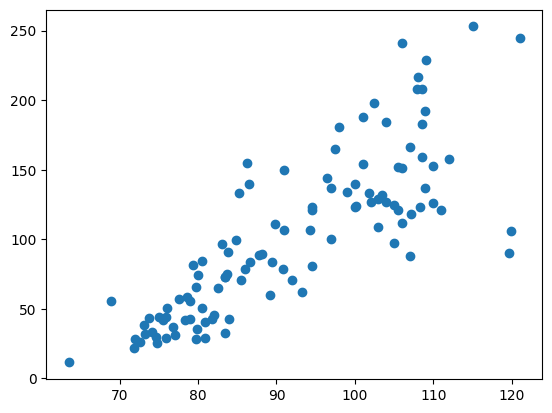

In [6]:
plt.scatter(df["Waist"],df["AT"])
plt.show()

In [7]:
df.corr() ### goood correlation

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


C:\Users\91863\AppData\Local\Temp\ipykernel_16720\1254428149.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Waist"])


<Axes: xlabel='Waist', ylabel='Density'>

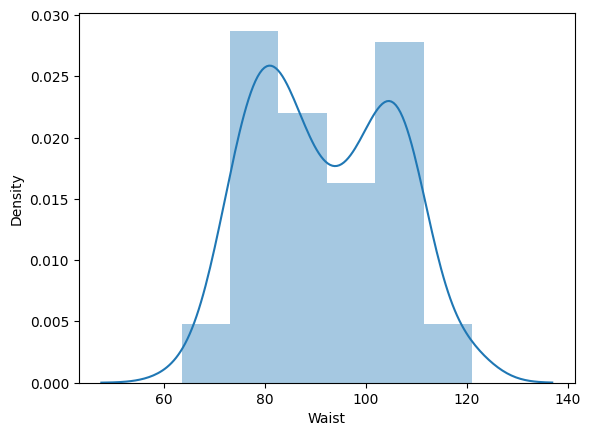

In [9]:
sns.distplot(df["Waist"])


C:\Users\91863\AppData\Local\Temp\ipykernel_16720\641359066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["AT"])


<Axes: xlabel='AT', ylabel='Density'>

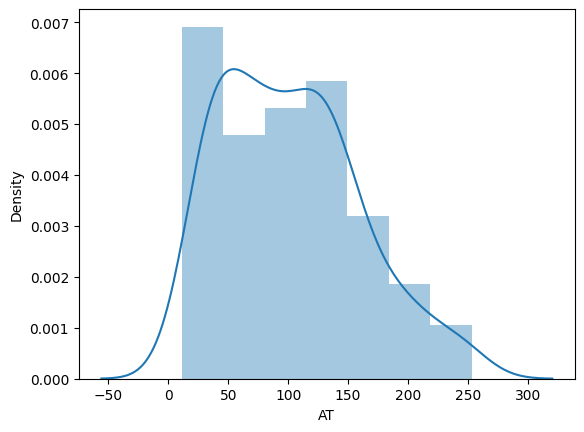

In [10]:
sns.distplot(df["AT"])

fitting a regreesion model

In [13]:
import statsmodels.formula.api as smf
model=smf.ols("AT~Waist",data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.62e-27
Time:                        18:26:18   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.params  ###Bo = -215.98    B1 = 3.45

Intercept   -215.981488
Waist          3.458859
dtype: float64

<Axes: xlabel='Waist', ylabel='AT'>

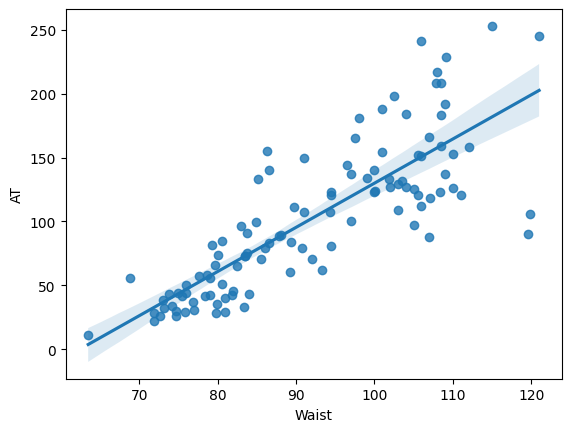

In [18]:
sns.regplot(x="Waist",y="AT",data=df)

In [19]:
model.tvalues, model.pvalues

(Intercept    -9.909103
 Waist        14.740376
 dtype: float64,
 Intercept    8.197416e-17
 Waist        1.618607e-27
 dtype: float64)

In [21]:
model.rsquared ## good

0.670036893052843

prediction

In [28]:
#new_data = pd.Series([79.34,50.45])

In [33]:
new_data= pd.DataFrame([68.45,100.67],columns=["Waist"])
new_data

,Waist
0,68.45
1,100.67


In [34]:
model.predict(new_data)

0     20.777437
1    132.221887
dtype: float64

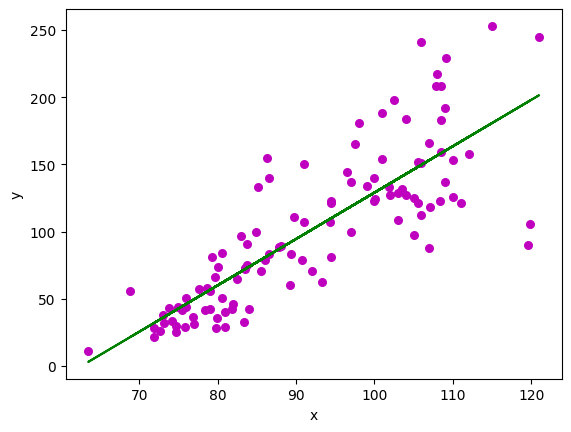

In [36]:
x=df["Waist"].values
y=df["AT"].values
plt.scatter(x,y,color="m",marker="o",s=30)
b0= -215.981488         
b1=  3.45
# predicted response vector
y_hat=b0+b1*x
#plotting the regression line
plt.plot(x,y_hat,color="g")
#putting labels
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [39]:
pred= model.predict(df["Waist"])
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [41]:
df["y_hat"]=pred
df

,Waist,AT,y_hat
0,74.75,25.72,42.568252
1,72.60,25.89,35.131704
2,81.80,42.60,66.953210
3,83.95,42.80,74.389758
4,74.65,29.84,42.222366
...,...,...,...
104,100.10,124.00,130.250337
105,93.30,62.20,106.730093
106,101.80,133.00,136.130398
107,107.90,208.00,157.229440


estimate accuracy

In [43]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

In [46]:
mean_squared_error(df["AT"],df["y_hat"])

1073.2292295533816

In [47]:
mean_absolute_percentage_error(df["AT"],df["y_hat"])

0.27999260322334557